
Analysis for chromosome 1 at 1000000 resolution (oe data):


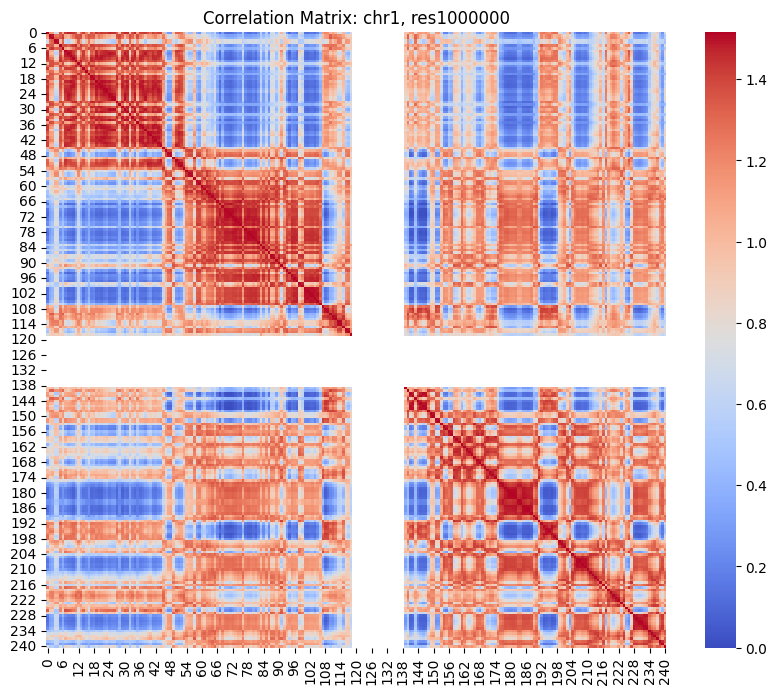

Correlation Matrix Statistics:
Mean: nan
Standard Deviation: nan
Min: nan
Max: nan

Analysis for chr 1 at 1000000 resolution (oe data):
Degree-2 Cumulant Matrix Statistics:
Mean: -0.3560139755706617
Standard Deviation: 0.2829424181788075
Min: -1.5637562131404399
Max: 9.3554142438058


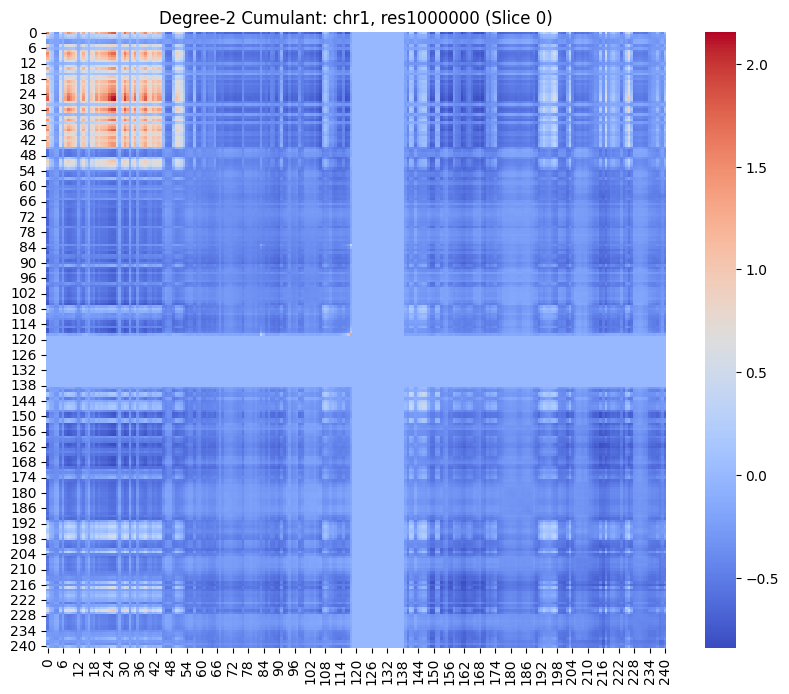

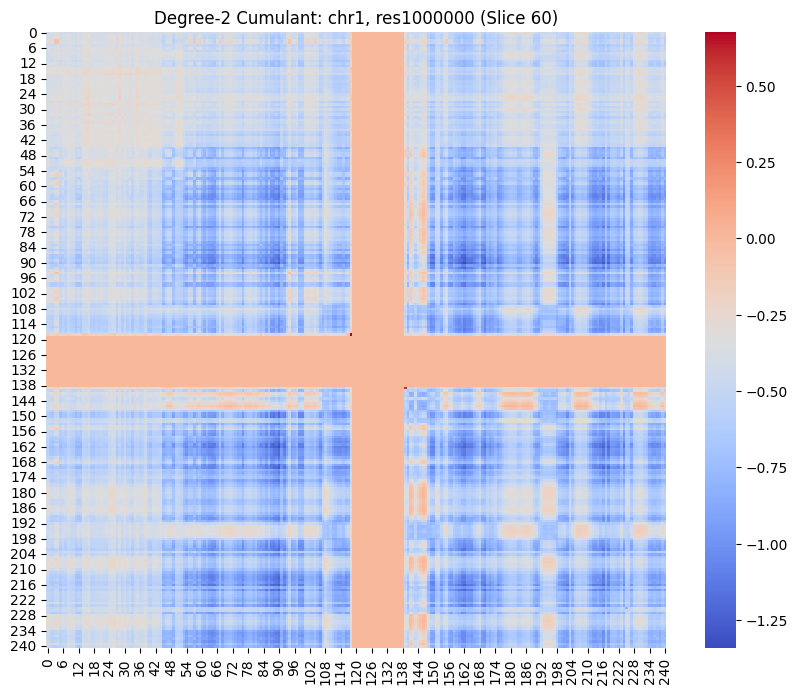

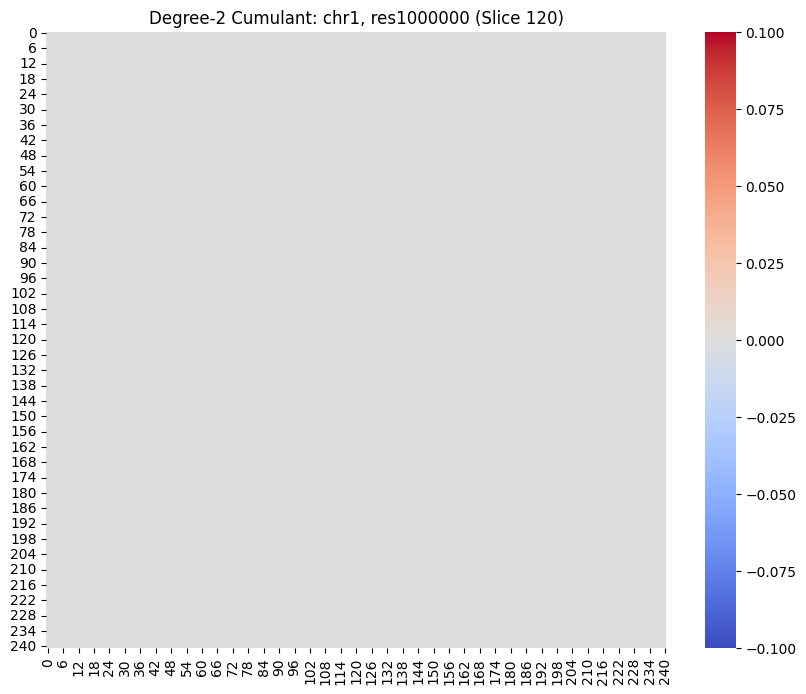

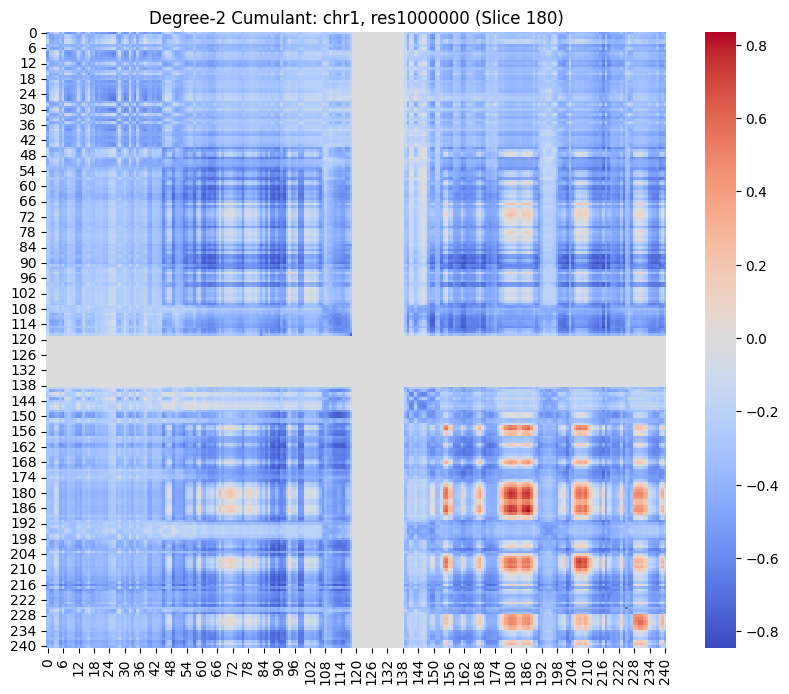

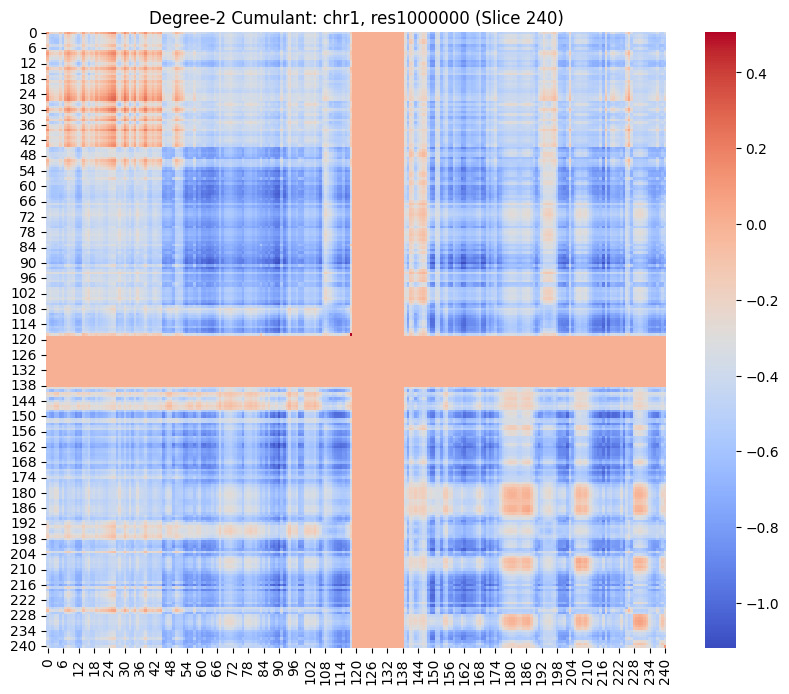

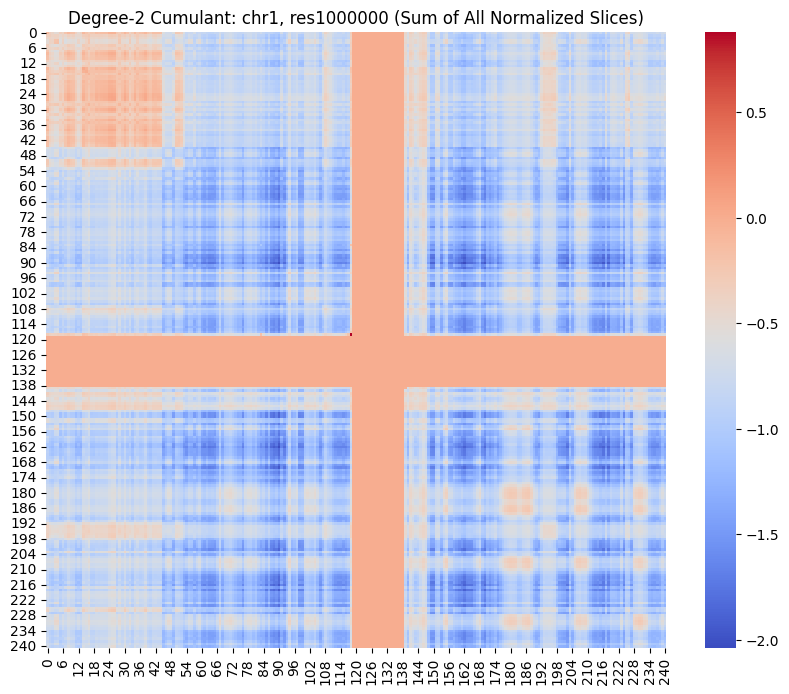

In [66]:
# Hi-C Matrix Analysis
# This notebook analyzes Hi-C correlation matrices and degree-2 cumulants generated by the previous scripts.

import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_matrix(file_path, dataset_name):
    try:
        with h5py.File(file_path, 'r') as hf:
            matrix = hf[dataset_name][:]
        return matrix
    except Exception as e:
        print(f"[ERROR] Failed to load matrix from {file_path}: {e}")
        return None

def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, cmap='coolwarm')
    plt.title(title)
    plt.show()

def plot_cumulant_slices(cumulant_matrix, title, num_slices=5):
    n = cumulant_matrix.shape[0]
    slice_indices = np.linspace(0, n-1, num_slices, dtype=int)
    for i in slice_indices:
        plt.figure(figsize=(10, 8))
        sns.heatmap(cumulant_matrix[i], cmap='coolwarm')
        plt.title(f'{title} (Slice {i})')
        plt.show()

def normalize_matrix(matrix):
    norm = np.linalg.norm(matrix)
    if norm == 0:
        return matrix
    return matrix / norm

def plot_sum_of_all_cumulant_slices(cumulant_matrix, title):
    n = cumulant_matrix.shape[0]
    combined_slices = np.zeros((cumulant_matrix.shape[1], cumulant_matrix.shape[2]))
    for i in range(n):
        normalized_slice = normalize_matrix(np.nan_to_num(cumulant_matrix[:,i,:]))
        combined_slices += normalized_slice
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(combined_slices, cmap='coolwarm')
    plt.title(f'{title} (Sum of All Normalized Slices)')
    plt.show()

def analyze_correlation_matrix(corr_matrix):
    print(f"Correlation Matrix Statistics:")
    print(f"Mean: {np.mean(corr_matrix)}")
    print(f"Standard Deviation: {np.std(corr_matrix)}")
    print(f"Min: {np.min(corr_matrix)}")
    print(f"Max: {np.max(corr_matrix)}")

def analyze_cumulant_matrix(cumulant_matrix):
    print(f"Degree-2 Cumulant Matrix Statistics:")
    print(f"Mean: {np.mean(cumulant_matrix)}")
    print(f"Standard Deviation: {np.std(cumulant_matrix)}")
    print(f"Min: {np.min(cumulant_matrix)}")
    print(f"Max: {np.max(cumulant_matrix)}")

# Path to the workspace
path = '/home/dwk681/workspace/hypermatrix_test/hypermatrix/projects/GSE63525/GM12878'
resolutions = [1_000_000] 
chromosomes = ['1']  
data_types = ['oe']  

for resolution in resolutions:
    for chromosome in chromosomes:
        for data_type in data_types:
            corr_file = f'{path}/Workspaces/individual/ch{chromosome}_res{resolution}_{data_type}_KR_corr_new.h5'
            cumulant_file = f'{path}/Workspaces/individual/ch{chromosome}_res{resolution}_{data_type}_KR_cumulant_new.h5'
            
            # Load and analyze correlation matrix
            if os.path.exists(corr_file):
                corr_matrix = load_matrix(corr_file, 'correlation_matrix')
                if corr_matrix is not None:
                    print(f"\nAnalysis for chromosome {chromosome} at {resolution} resolution ({data_type} data):")
                    plot_heatmap(corr_matrix, f'Correlation Matrix: chr{chromosome}, res{resolution}')
                    analyze_correlation_matrix(corr_matrix)
            else:
                print(f"[INFO] Correlation matrix file does not exist: {corr_file}")
            
            # Load and analyze degree-2 cumulant matrix
            if os.path.exists(cumulant_file):
                cumulant_matrix = load_matrix(cumulant_file, 'degree_2_cumulant')
                if cumulant_matrix is not None:
                    print(f"\nAnalysis for chr {chromosome} at {resolution} resolution ({data_type} data):")
                    analyze_cumulant_matrix(cumulant_matrix)
                    plot_cumulant_slices(cumulant_matrix, f'Degree-2 Cumulant: chr{chromosome}, res{resolution}', num_slices=5)
                    plot_sum_of_all_cumulant_slices(cumulant_matrix, f'Degree-2 Cumulant: chr{chromosome}, res{resolution}')
            else:
                print(f"[INFO] Degree-2 cumulant matrix file does not exist: {cumulant_file}")


In [67]:
cumulant_file = f'{path}/Workspaces/individual/ch{chromosome}_res{resolution}_{data_type}_KR_cumulant_new.h5'
cumulant_matrix = load_matrix(cumulant_file, 'degree_2_cumulant')


In [68]:
cumulant_matrix[:,1,:].shape

(241, 241)

In [69]:
import scipy.io
import numpy as np

# Define the path to the .mat file
path = "../projects/GSE63525/GM12878"  # Adjust this path as necessary
chromosome = "1"  # Adjust this as necessary
resolution = 1000000  # Adjust this as necessary
output_file = f"{path}/Workspaces/individual/ch{chromosome}_res{resolution}_structedData_2ndCumulant_first3_400iterations.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(output_file)

# Extract the factors
sol_factors = mat_data['sol_factors']

# Inspect the structure of sol_factors
print(sol_factors)


[[array([[array([[1.45062455e-116],
                 [4.00411685e-313],
                 [2.18296701e-001],
                 [3.00244213e-001],
                 [1.20063185e+000],
                 [8.64855976e-231],
                 [7.22304172e-262],
                 [3.01598583e-002],
                 [5.06506925e-001],
                 [4.62168243e-001],
                 [1.36648861e+000],
                 [3.67498908e-001],
                 [4.12284424e-001],
                 [5.92317410e-001],
                 [1.98466589e-001],
                 [3.00366976e-105],
                 [1.81242666e-001],
                 [7.75364913e-109],
                 [5.36743215e-035],
                 [2.22175496e-001],
                 [9.40945630e-001],
                 [8.18593228e-001],
                 [1.13495122e-001],
                 [3.82897533e-171],
                 [5.72074990e-001],
                 [8.70921576e-002],
                 [1.22778560e+000],
                 [5.30316304

In [70]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the .mat file
path = "../projects/GSE63525/GM12878/"  # Adjust this path as necessary
chromosome = "1"  # Adjust this as necessary
resolution = 1_000_000  
output_file = f"{path}Workspaces/individual/ch{chromosome}_res{resolution}_structedData_2ndCumulant_first3_400iterations.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(output_file)

# Extract the factors
factors = mat_data['sol_factors']




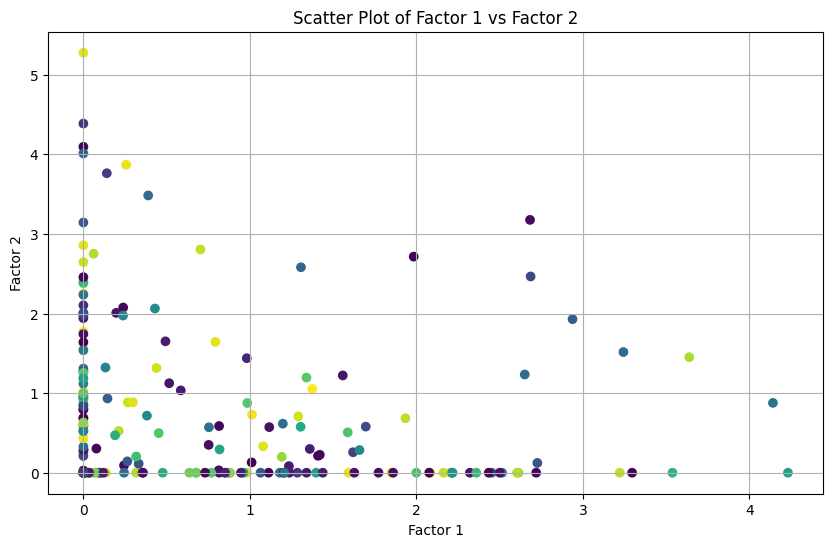

In [72]:
factor1 = factors[0][1][0][1][:,0]
factor2 = factors[0][1][0][1][:,1]
path = "../projects/GSE63525/GM12878/"
aiden_path = '/projects/b1198/epifluidlab/david/GSE63525/GM12878/'
file_path = aiden_path + f'eigenvector/res{resolution}_ch{chromosome}_observed_NONE_NONE_eigenvector.txt'
aiden = np.loadtxt(file_path)
 
dark_bins_file = f'{path}Workspaces/individual/ch{chromosome}_res{resolution}_darkBins.h5'    
dark_bins = load_dark_bins(dark_bins_file)
dark_bins.shape

mask = np.ones(aiden.shape[0], dtype=bool)
mask[dark_bins] = False
filtered_aiden = aiden[mask]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(factor1, factor2, c=filtered_aiden)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Scatter Plot of Factor 1 vs Factor 2')
plt.grid(True)
plt.show()

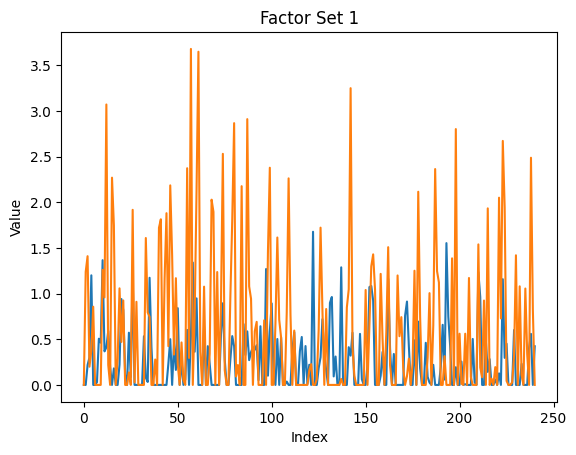

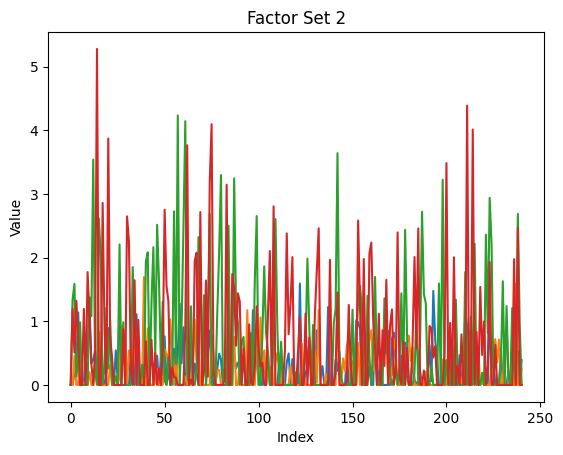

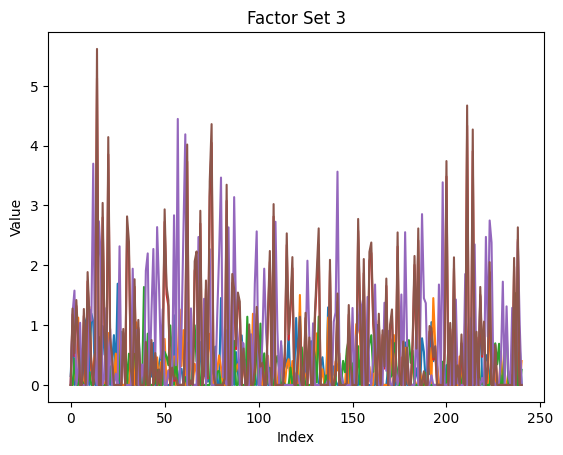

In [6]:
# Function to plot factors
def plot_factors(factors):
    num_factors = factors.shape[1]
    for i in range(num_factors):
        factor_set = factors[0, i][0]  # Adjusted to get the nested structure
        plt.figure()
        for factor in factor_set:
            if isinstance(factor, np.ndarray) and factor.size > 1:
                plt.plot(np.squeeze(factor))  # Ensure the factor is squeezed to 1D if possible
        plt.title(f'Factor Set {i+1}')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.show()

# Plot the factors
plot_factors(sol_factors)

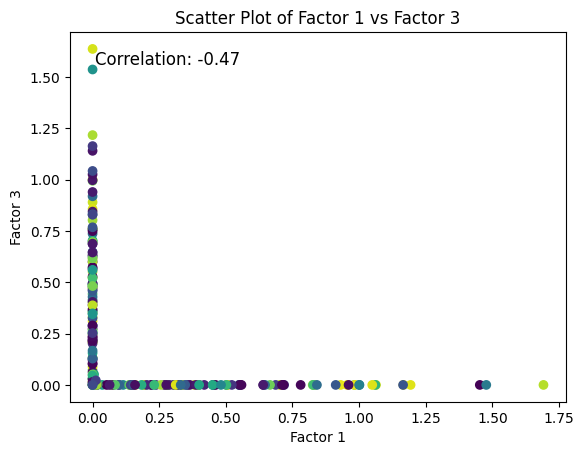

In [41]:
def load_dark_bins(file_path):
    try:
        with h5py.File(file_path, 'r') as hf:
            dark_bins = hf['dark_bins_indices'][:]
        return dark_bins
    except Exception as e:
        print(f"[ERROR] Failed to load dark bins from {file_path}: {e}")
        return None

def remove_dark_bins(matrix, dark_bins):
    try:
        mask = np.ones(matrix.shape[0], dtype=bool)
        mask[dark_bins] = False
        filtered_matrix = matrix[mask][:, mask]
        return filtered_matrix
    except Exception as e:
        print(f"[ERROR] Failed to remove dark bins: {e}")
        return None

path = "../projects/GSE63525/GM12878/"  # Adjust this path as necessary
chromosome = "1"  # Adjust this as necessary
resolution = 1000000  # Adjust this as necessary    
    
aiden_path = '/projects/b1198/epifluidlab/david/GSE63525/GM12878/'
file_path = aiden_path + f'eigenvector/res{resolution}_ch{chromosome}_observed_NONE_NONE_eigenvector.txt'
aiden = np.loadtxt(file_path)

aiden.shape   
dark_bins_file = f'{path}Workspaces/individual/ch{chromosome}_res{resolution}_darkBins.h5'    
dark_bins = load_dark_bins(dark_bins_file)
dark_bins.shape

mask = np.ones(aiden.shape[0], dtype=bool)
mask[dark_bins] = False
filtered_aiden = aiden[mask]

# Function to extract and plot two factors
def plot_factors_with_correlation(factors, factor_idx1=0, factor_idx2=2):
    factor_set = factors[0, 2][0][0] 
    
    # Assuming factors are 1D arrays, we will use the first arrays in each set for the scatter plot
    factor1 = factor_set[:,0]
    factor2 = factor_set[:,2]
    
    # Compute correlation
    correlation = np.corrcoef(factor1, factor2)[0, 1]
    
    # Plot the scatter plot
    plt.figure()
    plt.scatter(factor1, factor2, c=filtered_aiden)
    plt.title(f'Scatter Plot of Factor {factor_idx1+1} vs Factor {factor_idx2+1}')
    plt.xlabel(f'Factor {factor_idx1+1}')
    plt.ylabel(f'Factor {factor_idx2+1}')
    plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.show()

# Plot the factors with correlation
plot_factors_with_correlation(sol_factors)


In [ ]:
filtered_aiden.shape

In [ ]:
##################################################################
#This cell decides which of the two factors of a rank two decomposition is the A/B compartments
#And then makes a scatter plto of the two compartments colored by AIden Eigenvalues
#The purpose is to show that the NTF model can extract A/B comportment values from
#bulk Hi-C data
##################################################################

resolution = 1_000_000
path = '/projects/b1198/epifluidlab/david/GSE63525/GM12878/'
chromosome = 11
chromosome_string = 'chr' + str(chromosome)

def normalize_vector(active_factor):
    norm = np.linalg.norm(active_factor)
    if norm == 0:
        raise ValueError("Cannot normalize a zero vector")
    normalized_vector = active_factor / norm
    return normalized_vector

def load_and_replace_nan(file_path):
    data = np.loadtxt(file_path)
    return data

def calculate_bin_averages(data, elements_per_bin):
    num_bins = math.ceil(len(data)/elements_per_bin)
    bin_averages = np.zeros(num_bins)
    for i in range(num_bins):
        start_index = i * elements_per_bin
        end_index = min((i + 1) * elements_per_bin, len(data))
        bin_data = data[start_index:end_index]
        if len(bin_data) > 0:
            bin_averages[i] = np.mean(bin_data)
        else:
            bin_averages[i] = 0
    return np.nan_to_num(bin_averages, nan=0.0)

sol_factors_downsampled_by_ch = {}
components_by_channel = {ch: [] for ch in range(1, 23)}
removed_rowIndices_by_ch = {ch: [] for ch in range(1, 23)}
filtered_factor1 = []
filtered_factor2 = []
filtered_factor3 = []

for ch in range(1, 23):
    
    new_path = "../projects/GSE63525/GM12878"  # Adjust this path as necessary
    resolution = 1000000  # Adjust this as necessary
    output_file = f"{new_path}/Workspaces/individual/ch{chromosome}_res{resolution}_structedData_2ndCumulant_first3_400iterations.mat"
    data = scipy.io.loadmat(output_file)
    
    # Extract the factors
    sol_factors = data['sol_factors']
    factor2_set = sol_factors[0, 1][0][0]
    sol_factors_downsampled_by_ch[ch] = factor2_set
    
    removed_rows_path = new_path + f'Workspaces/individual/ch{ch}_res{resolution}_darkBins.h5'
    data2 = scipy.io.loadmat(removed_rows_path)
    removed_rowIndices_by_ch[ch] = data2['removed_rows_indices']
    N_ch = sol_factors_downsampled_by_ch[ch][0, 1][0, 0][:, 0].size
    filtered_indices_ch = [i for i in range(N_ch-2) if i not in removed_rowIndices_by_ch[ch]]

    # Extract the first two components for this chromosome
    for component in range(1, 3):
        component_data = data['sol_factors_downsampled'][0, 1][0, 0][:, component - 1]
        components_by_channel[ch].append(component_data)

    # Compute the correlations between the two components for this channel
    vector1 = components_by_channel[ch][0][filtered_indices_ch]
    vector2 = components_by_channel[ch][1][filtered_indices_ch]
    
    chromosome_string = 'chr' + str(ch)
    new_path = '/projects/b1198/epifluidlab/david/Genomic_Files/BigWigFiles/hg19/active/'
    bigwigfile1 = new_path + 'ENCFF154XCY_hg19_H3K4me3_GM12878.bigWig'
    bw_file1 = pyBigWig.open(bigwigfile1)
    start = 0
    end = bw_file1.chroms()[chromosome_string]
    data1 = bw_file1.values(chromosome_string, start, end)
    bin_averages1 = calculate_bin_averages(data1, resolution)
    bin_averages1_filtered = bin_averages1[filtered_indices_ch]
    
    correlation1 = np.corrcoef(vector1, bin_averages1_filtered)[0, 1]
    correlation2 = np.corrcoef(vector2, bin_averages1_filtered)[0, 1]
    if correlation1 > correlation2:
        active_factor = vector1
        passive_factor = vector2
    else:
        active_factor = vector2
        passive_factor = vector1
    
    file_path = path + f'eigenvector/res{resolution}_ch{ch}_observed_NONE_NONE_eigenvector.txt'
    vector3 = load_and_replace_nan(file_path)[filtered_indices_ch]
    vector4 = -vector3
    correlation1 = np.corrcoef(vector3, bin_averages1_filtered)[0, 1]
    correlation2 = np.corrcoef(vector4, bin_averages1_filtered)[0, 1]
    if correlation1 > correlation2:
        filtered_aiden_eigenvectors = vector3
    else:
        filtered_aiden_eigenvectors = vector4
    
    #normalize so that first entry is 1
    #this accounts for the arbitryness of only being defines up to a multiplicative constant
    active_factor = normalize_vector(active_factor)
    passive_factor = normalize_vector(passive_factor)
    
    filtered_factor1.extend(active_factor)
    filtered_factor2.extend(passive_factor)
    filtered_factor3.extend(filtered_aiden_eigenvectors)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle(f'Factors from Downsampled Hi-C Data\nres {resolution}', fontsize=20)

#axis1
#A and B factors colored by AidenLab's eigenvector
correlation_coefficient, p_value = scipy.stats.pearsonr(components_by_channel[chromosome][0][filtered_indices_ch], components_by_channel[chromosome][1][filtered_indices_ch])
file_path = path + f'eigenvector/res{resolution}_ch{chromosome}_observed_NONE_NONE_eigenvector.txt'
vector3 = load_and_replace_nan(file_path)[filtered_indices_ch]
vmin, vmax = np.min(vector3), np.max(vector3)
sc = ax1.scatter(components_by_channel[chromosome][0][filtered_indices_ch], components_by_channel[chromosome][1][filtered_indices_ch], c=vector3, cmap='viridis', vmin=vmin, vmax=vmax)
ax1.set_title(f'Scatter Plot of A and B compartment Factors\nchr {chromosome}\nCorrelation:{correlation_coefficient:.2f}, p-value: {p_value:.2f}\nColored By Aiden Eigenvector Value')
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Aiden Eigenvector')
ax1.set_xlabel('Factor 1')
ax1.set_ylabel('Factor 2')

#axis2
#genome_wide figure of A and B Factors colored by Aiden Lab's Eigenvector
vmin, vmax = np.min(filtered_factor3), np.max(filtered_factor3)
correlation_coefficient_genome_wide, p_value_genome_wide = scipy.stats.pearsonr(filtered_factor1, filtered_factor2)
sc = ax2.scatter(filtered_factor1, filtered_factor2, c=filtered_factor3, cmap='viridis')
ax2.set_title(f'Autosomal Chromosome Scatter Plot\nColored By Aiden Eigenvector Value\nCorrelation:{correlation_coefficient_genome_wide:.2f}, p-value: {p_value_genome_wide:.2f}')
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2)
cbar.set_label('Aiden Eigenvector')
ax2.set_xlabel('Factor 1')
ax2.set_ylabel('Factor 2')

caption = f'The first two factors of a rank two decomposition are always negatively correlated.\nCh1-22 Average Correlation: {correlation_coefficient_genome_wide:.2f}, average p-value: {p_value_genome_wide:.2f}.'
fig.text(0.5, 0.02, caption, ha='center', fontsize=12)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

fig2, ax = plt.subplots()
correlation_coefficient, p_value = scipy.stats.pearsonr(components_by_channel[chromosome][0][filtered_indices_ch], components_by_channel[chromosome][1][filtered_indices_ch])
ax.plot(components_by_channel[chromosome][0], 'b', linewidth=2, label='Factor One')
ax.plot(components_by_channel[chromosome][1], 'r', linewidth=2,  label='Factor Two')
ax.set_xlabel('Genomic Bin')
ax.set_ylabel('Value')
ax.set_title(f'Plot of chr {chromosome}\nCorrelation:{correlation_coefficient:.2f}, p-value: {p_value:.2f}')
ax.legend()
ax.grid(True)

plt.show()

#rename the factors for later usage
bulk_hic_a_compartment_filtered = filtered_factor1 
bulk_hic_b_compartment_filtered = filtered_factor2
bulk_hic_aiden_compartment_filtered = filtered_factor3

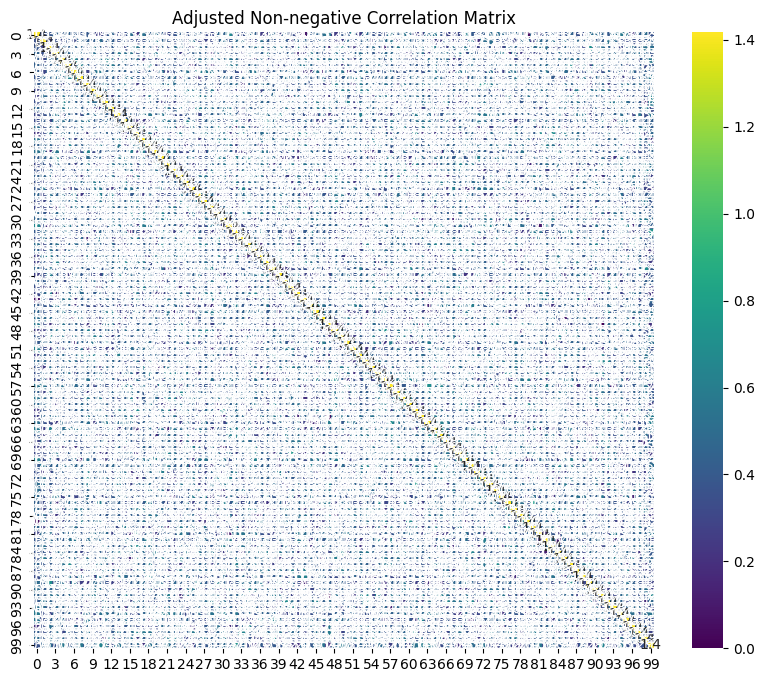

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a square matrix
size = 100  # Example size, you can change it as needed
np.random.seed(0)  # For reproducibility
matrix = np.random.rand(size, size)

# Step 2: Calculate the correlation matrix
correlation_matrix = np.corrcoef(matrix)

# Step 3: Add the minimum value to make the correlation matrix non-negative
min_value = np.min(correlation_matrix)
correlation_matrix += np.abs(min_value)

# Step 4: Plot the results
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', cbar=True)
plt.title('Adjusted Non-negative Correlation Matrix')
plt.show()
